<a href="https://colab.research.google.com/github/svfabi/Fabiano/blob/master/Ajustado_Formula_Aproxima%C3%A7%C3%A3osomatorioUsandoOutraAlternativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-21-7123f421ebf9>:37: RuntimeWarning: invalid value encountered in scalar divide
  rho_xy = cov_xy / (std_x * std_y)


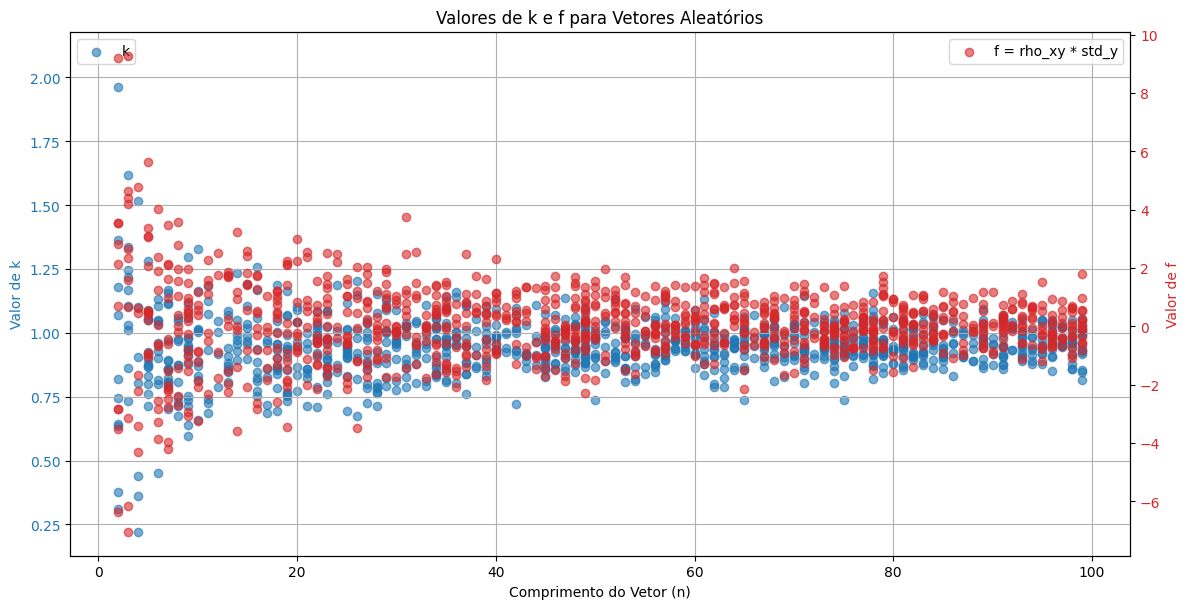

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# codigo para encontrar  uma função que aproxime valores de sumxy de sumxsumy
# gera vetores de tamanhos e valores aleatorios e verica o valor de K
# k proximos de 1 a função é a melhor para representar a aproximação
# da função para todos os valores de comprimento de vetor e seus valores xi e yi
# Versão Corrigida para calcular o Erro Corretamente
# Antes a formula era k = (sum_x*sum_y) / (sum_xy +  sum_y * (n - 1)))
import numpy as np
import matplotlib.pyplot as plt

# Funções auxiliares
def calculate_mean(vector):
    return np.mean(vector)

def calculate_std(vector):
    return np.std(vector, ddof=1)

def calculate_covariance(x, y):
    return np.cov(x, y, ddof=1)[0][1]

def calculate_f_b(x, y):
    std_x = calculate_std(x)
    covariance_xy = calculate_covariance(x, y)
    f_b = covariance_xy / std_x
    return f_b

# Função para calcular k e f
def calcular_k_e_f(x, y):
    n = len(x)
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    std_x = calculate_std(x)
    std_y = calculate_std(y)
    cov_xy = calculate_covariance(x, y)
    rho_xy = cov_xy / (std_x * std_y)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)

    # Fórmula corrigida para k
    k = (sum_xy) / (n * 10 * mean_y + n * std_y * (rho_xy * std_x))

    # Calculando f = rho_xy * std_y
    f = rho_xy * std_x

    return k, f, sum_x, sum_y

# Parâmetros para geração de vetores aleatórios
n_vetores = 1000  # Número máximo de vetores gerados aleatoriamente
n_Len_Vetor = 100  # Comprimento máximo do vetor gerado aleatoriamente
n_Len_Vetor_Inicial = 2  # Comprimento inicial do vetor gerado aleatoriamente
n_Valoresx = 20  # Valor máximo dos valores de xi
n_Valoresy = 120  # Valor máximo dos valores de yi

comprimentos = np.random.randint(n_Len_Vetor_Inicial, n_Len_Vetor, n_vetores)
ks = []
fs = []
somas_x = []
somas_y = []

for n in comprimentos:
    x = np.random.randint(0, n_Valoresx, n)
    y = np.random.randint(0, n_Valoresy, n)
    k, f, sum_x, sum_y = calcular_k_e_f(x, y)
    ks.append(k)
    fs.append(f)
    somas_x.append(sum_x)
    somas_y.append(sum_y)

# Plotar os resultados
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Comprimento do Vetor (n)')
ax1.set_ylabel('Valor de k', color=color)
ax1.scatter(comprimentos, ks, color=color, alpha=0.6, label='k')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:red'
ax2.set_ylabel('Valor de f', color=color)
ax2.scatter(comprimentos, fs, color=color, alpha=0.6, label='f = rho_xy * std_y')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # Ajusta o layout para que não haja sobreposição
plt.title('Valores de k e f para Vetores Aleatórios')
plt.show()
